# Librerías 

In [1]:
from pyspark.sql import Row
from pyspark.sql import SQLContext
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DecimalType
from pyspark.sql import functions as F

# Contexto Spark

In [2]:
conf = SparkConf()\
    .setAppName("test")\
    .setMaster("local[*]")\
    .set("spark.driver.extraJavaOptions","--add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED")
sc = SparkContext(conf=conf)

22/05/12 19:41:43 WARN Utils: Your hostname, MacBook-Pro-de-Alicia.local resolves to a loopback address: 127.0.0.1; using 192.168.1.75 instead (on interface en0)
22/05/12 19:41:43 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/12 19:41:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark = SparkSession \
    .builder \
    .appName("TFM - Alicia Rodriguez Gomez") \
    .getOrCreate()

Cargar Fuentes de Datos

# Lectura Fuente de Datos

Lectura Fuente de Datos

In [4]:
!ls source_data/*.csv

source_data/accidentes.csv
source_data/actividades_culturales.csv
source_data/altas_nacimiento.csv
source_data/aparcamiento.csv
source_data/asamblea_madrid.csv
source_data/ayudas.csv
source_data/ayuntamiento_2019.csv
source_data/bibliotecas.csv
source_data/bicis_aparcar.csv
source_data/cambio_domicilio_destino.csv
source_data/cambio_domicilio_origen.csv
source_data/compra_venta.csv
source_data/compra_venta_superficie.csv
source_data/congreso_diputados.csv
source_data/cotizacion.csv
source_data/defunciones.csv
source_data/detenidos_investigados.csv
source_data/duracion_contrato.csv
source_data/edades_tramos_grandes.csv
source_data/educacion.csv
source_data/emigracion.csv
source_data/entretenimiento.csv
source_data/esperanza_vida.csv
source_data/estructura_demografica.csv
source_data/evolucion_alquiler.csv
source_data/evolucion_vivienda_2_mano.csv
source_data/hosteleria.csv
source_data/indicador_demografico.csv
source_data/inmigracion.csv
source_data/inmuebles_publicos.csv
source_data/in

In [5]:
df_accidentes = spark.read.csv('source_data/accidentes.csv',header=True, sep=';')
df_actividades_culturales = spark.read.csv('source_data/actividades_culturales.csv',header=True, sep=';')
df_altas_nacimiento = spark.read.csv('source_data/altas_nacimiento.csv',header=True, sep=';')
df_aparcamiento = spark.read.csv('source_data/aparcamiento.csv',header=True, sep=';')
df_asamblea_madrid = spark.read.csv('source_data/asamblea_madrid.csv',header=True, sep=';')
df_ayudas = spark.read.csv('source_data/ayudas.csv',header=True, sep=';')
df_ayuntamiento_2019 = spark.read.csv('source_data/ayuntamiento_2019.csv',header=True, sep=';')
df_bibliotecas = spark.read.csv('source_data/bibliotecas.csv',header=True, sep=';')
df_bicis_aparcar = spark.read.csv('source_data/bicis_aparcar.csv',header=True, sep=';')
df_cambio_domicilio_destino = spark.read.csv('source_data/cambio_domicilio_destino.csv',header=True, sep=';')
df_cambio_domicilio_origen = spark.read.csv('source_data/cambio_domicilio_origen.csv',header=True, sep=';')
df_compra_venta = spark.read.csv('source_data/compra_venta.csv',header=True, sep=';')
df_compra_venta_superficie = spark.read.csv('source_data/compra_venta_superficie.csv',header=True, sep=';')
df_congreso_diputados = spark.read.csv('source_data/congreso_diputados.csv',header=True, sep=';')
df_cotizacion = spark.read.csv('source_data/cotizacion.csv',header=True, sep=';')
df_defunciones = spark.read.csv('source_data/defunciones.csv',header=True, sep=';')
df_detenidos_investigados = spark.read.csv('source_data/detenidos_investigados.csv',header=True, sep=';')
df_duracion_contrato = spark.read.csv('source_data/duracion_contrato.csv',header=True, sep=';')
df_edades_tramos_grandes = spark.read.csv('source_data/edades_tramos_grandes.csv',header=True, sep=';')
df_educacion = spark.read.csv('source_data/educacion.csv',header=True, sep=';')
df_emigracion = spark.read.csv('source_data/emigracion.csv',header=True, sep=';')
df_entretenimiento = spark.read.csv('source_data/entretenimiento.csv',header=True, sep=';')
df_esperanza_vida = spark.read.csv('source_data/esperanza_vida.csv',header=True, sep=';')
df_estructura_demografica = spark.read.csv('source_data/estructura_demografica.csv',header=True, sep=';')
df_evolucion_alquiler = spark.read.csv('source_data/evolucion_alquiler.csv',header=True, sep=';')
df_evolucion_vivienda_2_mano = spark.read.csv('source_data/evolucion_vivienda_2_mano.csv',header=True, sep=';')
df_hosteleria = spark.read.csv('source_data/hosteleria.csv',header=True, sep=';')
df_indicador_demografico = spark.read.csv('source_data/indicador_demografico.csv',header=True, sep=';')
df_inmigracion = spark.read.csv('source_data/inmigracion.csv',header=True, sep=';')
df_inmuebles_publicos = spark.read.csv('source_data/inmuebles_publicos.csv',header=True, sep=';')
df_instalaciones_deportivas = spark.read.csv('source_data/instalaciones_deportivas.csv',header=True, sep=';')
df_jornada = spark.read.csv('source_data/jornada.csv',header=True, sep=';')
df_lugar_nacimiento = spark.read.csv('source_data/lugar_nacimiento.csv',header=True, sep=';')
df_paro = spark.read.csv('source_data/paro.csv',header=True, sep=';')
df_pensiones = spark.read.csv('source_data/pensiones.csv',header=True, sep=';')
df_pensiones_cobro = spark.read.csv('source_data/pensiones_cobro.csv',header=True, sep=';')
df_poblacion = spark.read.csv('source_data/poblacion.csv',header=True, sep=';')
df_rama = spark.read.csv('source_data/rama.csv',header=True, sep=';')
df_regimenes_cotizacion = spark.read.csv('source_data/regimenes_cotizacion.csv',header=True, sep=';')
df_sector = spark.read.csv('source_data/sector.csv',header=True, sep=';')
df_superficie = spark.read.csv('source_data/superficie.csv',header=True, sep=';')
df_tamaño_hogar = spark.read.csv('source_data/tamaño_hogar.csv',header=True, sep=';')
df_tasa_migracion = spark.read.csv('source_data/tasa_migracion.csv',header=True, sep=';')
df_taxi = spark.read.csv('source_data/taxi.csv',header=True, sep=';')
df_turismo = spark.read.csv('source_data/turismo.csv',header=True, sep=';')
df_viven_solos = spark.read.csv('source_data/viven_solos.csv',header=True, sep=';')
df_zonas_verdes = spark.read.csv('source_data/zonas_verdes.csv',header=True, sep=';')

In [8]:
df_accidentes = df_accidentes\
    .withColumn("ACCIDENTES",F.regexp_replace("Accidentes", "\.", "").cast(IntegerType())  )\
    .withColumn("HERIDOS" ,F.regexp_replace("Heridos", "\.", "").cast(IntegerType()) )\
    .withColumn("MUERTOS",F.regexp_replace("Muertos", "\.", "").cast(IntegerType()) )
#df_accidentes.show(5)

In [7]:
#df_actividades_culturales.show(5)
df_cultural = df_actividades_culturales\
    .withColumn("NUM_ACTIVIDADES_CULTURALES",F.regexp_replace("Total Actividades", "\.", "").cast(IntegerType()) )\
    .filter(col("DISTRITO")!="Ciudad de Madrid")\
    .select("AÑO","DISTRITO","NUM_ACTIVIDADES_CULTURALES")
#df_cultural.show(5)

In [9]:
#df_altas_nacimiento.show(5)
df_nacimientos = df_altas_nacimiento\
    .withColumn("NACIMIENTOS" ,F.regexp_replace("Total", "\.", "").cast(IntegerType())  )\
    .select("AÑO","DISTRITO","BARRIO","NACIMIENTOS")
#df_nacimientos.show()

In [10]:
#df_aparcamiento.show(5)
df_aparcamiento=df_aparcamiento\
    .withColumn("AUTORIZACIONES_SER",F.regexp_replace("Autorizaciones SER", "\.", "").cast(IntegerType()))
#df_aparcamiento.show(5)

In [11]:
#df_asamblea_madrid.show(5)
df_asamblea= df_asamblea_madrid\
    .withColumn("VOTOS_PP",F.regexp_replace("PP", "\,", "").cast(IntegerType()))\
    .withColumn("VOTOS_PSOE",F.regexp_replace("PSOE", "\,", "").cast(IntegerType()))\
    .withColumn("VOTOS_VOX",F.regexp_replace("VOX", "\,", "").cast(IntegerType()))\
    .withColumn("VOTOS_PODEMOS",F.regexp_replace("PODEMOS-IU", "\,", "").cast(IntegerType()))\
    .select("AÑO","DISTRITO","BARRIO","VOTOS_PP","VOTOS_PSOE","VOTOS_VOX","VOTOS_PODEMOS")
#df_asamblea.show(5)

In [12]:
#df_ayudas.show(5)
df_ayudas_beneficiarios = df_ayudas\
    .withColumn("TOTAL_BENEFICIARIOS", F.regexp_replace("Total Beneficiarios", "\.", "").cast(IntegerType()) )\
    .withColumn("TOTAL_AYUDA_AUX", F.regexp_replace("Total ayuda", "\.", "") )\
    .withColumn("TOTAL_AYUDA", F.regexp_replace("TOTAL_AYUDA_AUX", "\,", ".").cast(DecimalType(12,2)) )\
    .select("AÑO","DISTRITO","TOTAL_BENEFICIARIOS","TOTAL_AYUDA")
#df_ayudas_beneficiarios.show(5)

In [13]:
#df_ayuntamiento_2019.show(5)
df_ayuntamiento = df_ayuntamiento_2019\
    .withColumnRenamed("P.S.O.E.","PSOE")\
    .withColumnRenamed("P.P.","PP")\
    .withColumn("PSOE_VOTOS", F.regexp_replace("PSOE", "\.", "" ).cast(IntegerType()) )\
    .withColumn("PP_VOTOS", F.regexp_replace("PP", "\.", "").cast(IntegerType()) )\
    .withColumn("VOX_VOTOS", F.regexp_replace("VOX", "\.", "").cast(IntegerType()) )\
    .withColumn("MM_VOTOS", F.regexp_replace("MAS MADRID", "\.", "").cast(IntegerType()) )\
    .select("AÑO","DISTRITO","BARRIO","PSOE_VOTOS","PP_VOTOS","VOX_VOTOS","MM_VOTOS")
#df_ayuntamiento.show(5)

In [14]:
#df_bibliotecas.show(5)
df_bibliotecas_usuarios = df_bibliotecas\
    .withColumn("PUESTO_LECTURA", F.regexp_replace("Puestos de lectura", "\.", "" ).cast(IntegerType()))\
    .withColumn("USUARIOS_BIBLIOTECA", F.regexp_replace("Usuarios", "\.", "" ).cast(IntegerType()))\
    .select("AÑO","DISTRITO","PUESTO_LECTURA","USUARIOS_BIBLIOTECA")
#df_bibliotecas_usuarios.show(5)

In [15]:
#df_bicis_aparcar.show(5)
df_bicis = df_bicis_aparcar\
    .withColumnRenamed("Puntos Aparca-bici","APARCA_BICIS")\
    .select("AÑO","DISTRITO","BARRIO","APARCA_BICIS")
#df_bicis.show()

In [64]:
#df_cambio_domicilio_destino.show(5)
df_cambio_domicilio_destino = df_cambio_domicilio_destino\
    .withColumn("NUM_NUEVOS_VECINOS", F.regexp_replace("Num nuevos vecinos", "\.", "" ).cast(IntegerType()))
#df_cambio_domicilio_destino.show(5)

In [20]:
#df_cambio_domicilio_origen.show(5)
df_cambio_domicilio_origen= df_cambio_domicilio_origen\
    .withColumn("NUM_VECINOS_DEJAN_BARRIO", F.regexp_replace("Num vecinos dejan el barrio", "\.", "" ).cast(IntegerType()))
#df_cambio_domicilio_origen.show(5)

+----+----------+----------------+---------------------------+
| AÑO|  DISTRITO|          BARRIO|Num vecinos dejan el barrio|
+----+----------+----------------+---------------------------+
|2017|01. Centro|      01. Centro|                       null|
|2017|01. Centro|      01. Centro|                     11.616|
|2017|01. Centro|    011. Palacio|                      1.705|
|2017|01. Centro|012. Embajadores|                      4.332|
|2017|01. Centro|     013. Cortes|                        857|
+----+----------+----------------+---------------------------+
only showing top 5 rows



In [21]:
#df_compra_venta.show(5)
df_venta = df_compra_venta.withColumn("VIVIENDAS_VENTA", F.regexp_replace("Total viviendas", "\.", "" ).cast(IntegerType()))\
    .select("AÑO","DISTRITO","BARRIO","VIVIENDAS_VENTA")
#df_venta.show(5)

In [22]:
#df_compra_venta_superficie.show(5)
df_venta_superficie = df_compra_venta_superficie\
    .withColumn("VIVIENDA_MENOS_40_M2", F.regexp_replace("Menos de 40 m2", "\.", "" ).cast(IntegerType()))\
    .withColumn("VIVIENDA_40_60_M2", F.regexp_replace("40 a 60 m2", "\.", "" ).cast(IntegerType()))\
    .withColumn("VIVIENDA_60_80_M2", F.regexp_replace("60 a 80 m2", "\.", "" ).cast(IntegerType()))\
    .withColumn("VIVIENDA_80_100_M2", F.regexp_replace("80 a 100 m2", "\.", "" ).cast(IntegerType()))\
    .withColumn("VIVIENDA_MAS_100_M2", F.regexp_replace("Más de 100 m2", "\.", "" ).cast(IntegerType()))\
    .select("AÑO","DISTRITO","BARRIO","VIVIENDA_MENOS_40_M2","VIVIENDA_40_60_M2","VIVIENDA_60_80_M2","VIVIENDA_80_100_M2","VIVIENDA_MAS_100_M2")
#df_venta_superficie.show(5)

In [23]:
#df_congreso_diputados.show(5)
df_congreso = df_congreso_diputados\
    .withColumn("VOTOS_PSOE", F.regexp_replace("PSOE", "\.", "" ).cast(IntegerType()))\
    .withColumn("VOTOS_PP", F.regexp_replace("PP", "\.", "" ).cast(IntegerType()))\
    .withColumn("VOTOS_PODEMOS", F.regexp_replace("PODEMOS-IUEQUO", "\.", "" ).cast(IntegerType()))\
    .withColumn("VOTOS_VOX", F.regexp_replace("VOX", "\.", "" ).cast(IntegerType()))\
    .select("AÑO","DISTRITO","BARRIO","VOTOS_PSOE","VOTOS_PP","VOTOS_PODEMOS","VOTOS_VOX")
#df_congreso.show(5)

In [24]:
#df_cotizacion.show(5)
df_tipo_cotizacion = df_cotizacion\
    .withColumnRenamed("Ingenieros y licenciados. Personal de alta dirección","Ingenieros y licenciados")\
    .withColumn("INGENIEROS", F.regexp_replace("Ingenieros y licenciados", "\.", "" ).cast(IntegerType()))\
    .withColumn("INGENIEROS_TECNICOS", F.regexp_replace("Ingenieros técnicos, peritos y ayudantes titulados", "\.", "" ).cast(IntegerType()))\
    .withColumn("ADMINISTRATIVOS", F.regexp_replace("Jefes administrativos y de taller", "\.", "" ).cast(IntegerType()))\
    .withColumn("AYUDANTES", F.regexp_replace("Ayudantes no titulados","\.", "" ).cast(IntegerType()))\
    .withColumn("OFICIALES_AD", F.regexp_replace("Oficiales administrativos", "\.", "" ).cast(IntegerType()))\
    .withColumn("SUBALTERNOS", F.regexp_replace("Subalternos", "\.", "" ).cast(IntegerType()))\
    .withColumn("AUXILIARES", F.regexp_replace("Auxiliares administrativos", "\.", "" ).cast(IntegerType()))\
    .withColumn("OFICIALES", F.regexp_replace("Oficiales de primera y segunda", "\.", "" ).cast(IntegerType()))\
    .withColumn("PEONES", F.regexp_replace("Peones", "\.", "" ).cast(IntegerType()))\
    .withColumn("MENOR_18", F.regexp_replace("Trabajadores menores de 18 años", "\.", "" ).cast(IntegerType()))\
    .select("AÑO","DISTRITO","BARRIO","INGENIEROS","INGENIEROS_TECNICOS","ADMINISTRATIVOS","AYUDANTES","OFICIALES_AD","SUBALTERNOS","AUXILIARES","OFICIALES","PEONES","MENOR_18")
#df_tipo_cotizacion.show(5)

In [25]:
#df_defunciones.show(5)
df_muertes = df_defunciones\
    .withColumn("0_4", F.regexp_replace("     0 a 4 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("5_9", F.regexp_replace("     5 a 9 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("10_14", F.regexp_replace("     10 a 14 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("15_19", F.regexp_replace("     15 a 19 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("20_24", F.regexp_replace("     20 a 24 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("25_29", F.regexp_replace("     25 a 29 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("30_34", F.regexp_replace("     30 a 34 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("35_39", F.regexp_replace("     35 a 39 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("40_44", F.regexp_replace("     40 a 44 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("45_49", F.regexp_replace("     45 a 49 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("50_54", F.regexp_replace("     50 a 54 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("55_59", F.regexp_replace("     55 a 59 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("60_64", F.regexp_replace("     60 a 64 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("65_69", F.regexp_replace("     65 a 69 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("70_74", F.regexp_replace("     70 a 74 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("75_79", F.regexp_replace("     75 a 79 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("80_84", F.regexp_replace("     80 a 84 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("85_89", F.regexp_replace("     85 a 89 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("90_94", F.regexp_replace("     90 a 94 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("95_99", F.regexp_replace("     95 a 99 años", "\.", "" ).cast(IntegerType()))\
    .withColumn("MAS_100", F.regexp_replace("     100 y más años", "\.", "" ).cast(IntegerType()))\
    .withColumn("OTROS", F.regexp_replace("     No consta", "\.", "" ).cast(IntegerType()))\
    .withColumn("MUERTES",col("0_4")+col("5_9")+col("10_14")+col("15_19")
                +col("20_24")+col("25_29")+col("30_34")+col("35_39")
                +col("40_44")+col("45_49")+col("50_54")+col("55_59")
                +col("60_64")+col("65_69")+col("70_74")+col("75_79")
                +col("80_84")+col("85_89")+col("90_94")+col("95_99")
                +col("MAS_100")+col("OTROS"))\
    .select("AÑO","DISTRITO","MUERTES")
#df_muertes.show(5)

In [26]:
#df_detenidos_investigados.show(5)
df_detenidos = df_detenidos_investigados\
    .withColumn("NUM_DETENIDOS", F.regexp_replace("Num detenidos e investigados", "\.", "" ).cast(IntegerType()))\
    .select("AÑO","DISTRITO","NUM_DETENIDOS")
#df_detenidos.show(5)

In [27]:
#df_duracion_contrato.show(5)
df_duracion_contrato = df_duracion_contrato\
    .withColumnRenamed("Temporal","TEMPORAL")\
    .withColumnRenamed("Indefinido","INDEFINIDO")
#df_duracion_contrato.show(5)

In [28]:
#df_edades_tramos_grandes.show(5)
df_edad_tramos_grandes = df_edades_tramos_grandes\
    .withColumn("H_ESP_0_15",    F.regexp_replace("Hombre Españoles 0 a 15 años"   , "\.", "" ).cast(IntegerType()) )\
    .withColumn("H_EXT_0_15",    F.regexp_replace("Hombre Extranjero 0 a 15 años"  , "\.", "" ).cast(IntegerType()) )\
    .withColumn("H_ESP_16_64",   F.regexp_replace("Hombre Españoles 16 a 64 años"  , "\.", "" ).cast(IntegerType()) )\
    .withColumn("H_EXT_16_64",   F.regexp_replace("Hombre Extranjero 16 a 64 años" , "\.", "" ).cast(IntegerType()) )\
    .withColumn("H_ESP_MAS_65",  F.regexp_replace("Hombre Españoles 65 y más años" , "\.", "" ).cast(IntegerType()) )\
    .withColumn("H_EXT_MAS_65",  F.regexp_replace("Hombre Extranjero 65 y más años", "\.", "" ).cast(IntegerType()) )\
    .withColumn("M_ESP_0_15",    F.regexp_replace("Mujeres Españolas 0 a 15 años"   , "\.", "" ).cast(IntegerType()) )\
    .withColumn("M_EXT_0_15",    F.regexp_replace("Mujeres Extranjera 0 a 15 años"  , "\.", "" ).cast(IntegerType()) )\
    .withColumn("M_ESP_16_64",   F.regexp_replace("Mujeres Españolas 16 a 64 años"  , "\.", "" ).cast(IntegerType()) )\
    .withColumn("M_EXT_16_64",   F.regexp_replace("Mujeres Extranjera 16 a 64 años" , "\.", "" ).cast(IntegerType()) )\
    .withColumn("M_ESP_MAS_65",  F.regexp_replace("Mujeres Españolas 65 y más años" , "\.", "" ).cast(IntegerType()) )\
    .withColumn("M_EXT_MAS_65",  F.regexp_replace("Mujeres Extranjera 65 y más años", "\.", "" ).cast(IntegerType()) )\
    .withColumn("HOMBRE_HASTA_15", col("H_ESP_0_15")+col("H_EXT_0_15"))\
    .withColumn("HOMBRE_16_64", col("H_ESP_16_64")+col("H_EXT_16_64"))\
    .withColumn("HOMBRE_DESDE_65", col("H_ESP_MAS_65")+col("H_EXT_MAS_65"))\
    .withColumn("MUJER_HASTA_15", col("M_ESP_0_15")+col("M_EXT_0_15"))\
    .withColumn("MUJER_16_64", col("M_ESP_16_64")+col("M_EXT_16_64"))\
    .withColumn("MUJER_DESDE_65", col("M_ESP_MAS_65")+col("M_EXT_MAS_65"))\
    .withColumn("TOTAL_HOMBRES_ESPAÑOLES",col("H_ESP_0_15")+col("H_ESP_16_64")+col("H_ESP_MAS_65"))\
    .withColumn("TOTAL_MUJERES_ESPAÑOLAS",col("M_ESP_0_15")+col("M_ESP_16_64")+col("M_ESP_MAS_65"))\
    .withColumn("TOTAL_HOMBRES_EXTRANJEROS",col("H_EXT_0_15")+col("H_EXT_16_64")+col("H_EXT_MAS_65"))\
    .withColumn("TOTAL_MUJERES_EXTRANJERAS",col("M_EXT_0_15")+col("M_EXT_16_64")+col("M_EXT_MAS_65"))\
    .select("AÑO","DISTRITO","BARRIO","HOMBRE_HASTA_15","HOMBRE_16_64","HOMBRE_DESDE_65","MUJER_HASTA_15",
            "MUJER_16_64","MUJER_DESDE_65","TOTAL_HOMBRES_ESPAÑOLES","TOTAL_MUJERES_ESPAÑOLAS","TOTAL_HOMBRES_EXTRANJEROS",
           "TOTAL_MUJERES_EXTRANJERAS")
#df_edad_tramos_grandes.show(5)


In [29]:
#df_educacion.show(5)
df_educacion = df_educacion.withColumnRenamed("Num actividades","NUM_ACTIVIDADES")
#df_educacion.show(5)

In [30]:
#df_emigracion.show(5)
df_emigrantes= df_emigracion\
    .withColumn("TOTAL_EMIGRACION",
                F.regexp_replace("Pais origen España", "\.", "").cast(IntegerType())
                + F.regexp_replace("Origen Resto países de Europa", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen América del Norte", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen América Central", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen América del Sur", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen África", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen Asia", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen Oceanía", "\.", "").cast(IntegerType()))\
    .select("AÑO","DISTRITO","BARRIO","TOTAL_EMIGRACION")
#df_emigrantes.show(5)

In [31]:
#df_entretenimiento.show(5)
df_actividades_entretenimiento = df_entretenimiento\
    .withColumn("TOTAL_ACTIVIDADES", (col("Actividades de creación, artísticas y espectáculos")
                +col("Actividades de bibliotecas, archivos, museos y otras actividades culturales")
                +col("Actividades de juegos de azar y apuestas")
                +col("Actividades deportivas, recreativas y de entretenimiento")).cast(IntegerType()))\
    .select("AÑO","DISTRITO","BARRIO","TOTAL_ACTIVIDADES")
#df_actividades_entretenimiento.show(5)

In [32]:
#df_esperanza_vida.show(5)
df_años_vida = df_esperanza_vida\
    .withColumn("ESPERANZA_VIDA", F.regexp_replace("   Esperanza de vida Menos de 1 año","\,",".").cast(DecimalType(12,2)) )\
    .select("AÑO","DISTRITO","ESPERANZA_VIDA")
#df_años_vida.show(5)

In [33]:
#df_estructura_demografica.show(5)
df_demografia = df_estructura_demografica\
    .withColumnRenamed("Densidad (Habitantes/Ha.)","Densidad")\
    .withColumn("DENSIDAD", F.regexp_replace("Densidad","\,",".").cast(DecimalType(12,2)) )\
    .withColumn("EDAD_MEDIA", F.regexp_replace("Edad promedio","\,",".").cast(DecimalType(12,2)) )\
    .withColumn("PROPORCION_JUVENTUD", F.regexp_replace("Proporción de juventud","\,",".").cast(DecimalType(12,2)) )\
    .withColumn("PROPORCION_ENVEJECIMIENTO", F.regexp_replace("Proporción de envejecimiento","\,",".").cast(DecimalType(12,2)) )\
    .withColumn("PROPORCION_EXTRANJEROS", F.regexp_replace("Proporción de extranjeros","\,",".").cast(DecimalType(12,2)) )\
    .select("AÑO","DISTRITO","BARRIO","DENSIDAD","EDAD_MEDIA","PROPORCION_JUVENTUD","PROPORCION_ENVEJECIMIENTO","PROPORCION_EXTRANJEROS")
#df_demografia.show(5)

In [34]:
#df_evolucion_alquiler.show(5)
df_alquiler = df_evolucion_alquiler\
    .withColumn("PRECIO_MEDIO_ALQUILER_M2", F.regexp_replace("Precio Medio alquiler","\,",".").cast(DecimalType(12,2)) )\
    .select("AÑO","DISTRITO","PRECIO_MEDIO_ALQUILER_M2")


#df_alquiler.show(5)

In [35]:
#df_evolucion_vivienda_2_mano.show(5)
df_precio_vivienda = df_evolucion_vivienda_2_mano\
    .withColumn("PRECIO_VIVIENDA",col("Precio Vivienda").cast(DecimalType(12,3)) )\
    .filter(col("PRECIO_VIVIENDA").isNotNull())\
    .select("AÑO","DISTRITO","BARRIO","PRECIO_VIVIENDA")

#df_precio_vivienda.show(5)

In [36]:
#df_hosteleria.show(5)
df_hoteles_bares = df_hosteleria\
    .withColumn("NUM_ALOJAMIENTOS",F.regexp_replace("Servicios de alojamiento", "\.", "").cast(IntegerType()))\
    .withColumn("NUM_BARES",F.regexp_replace("Servicios de comidas y bebidas", "\.", "").cast(IntegerType()))\
    .filter(col("NUM_ALOJAMIENTOS").isNotNull())\
    .filter(col("NUM_BARES").isNotNull())\
    .select("AÑO","DISTRITO","BARRIO","NUM_ALOJAMIENTOS","NUM_BARES")
    
#df_hoteles_bares.show(5)

In [37]:
#df_indicador_demografico.show(5)
df_indic_demografico = df_indicador_demografico\
    .withColumn("EDAD_MEDIA", F.regexp_replace("Edad promedio","\,",".").cast(DecimalType(12,2)) )\
    .withColumn("POBLACION",F.regexp_replace("Total Población", "\.", "").cast(IntegerType()))\
    .select("AÑO","DISTRITO","POBLACION","EDAD_MEDIA")
#df_indic_demografico.show(5)

In [38]:
#df_inmigracion.show(5)
df_inmigrantes= df_inmigracion\
    .withColumn("TOTAL_INMIGRACION",
                F.regexp_replace("Pais origen España", "\.", "").cast(IntegerType())
                + F.regexp_replace("Origen Resto países de Europa", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen América del Norte", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen América Central", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen América del Sur", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen África", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen Asia", "\.", "").cast(IntegerType())
                + F.regexp_replace("Pais origen Oceanía", "\.", "").cast(IntegerType()))\
    .select("AÑO","DISTRITO","BARRIO","TOTAL_INMIGRACION")\
    .filter(col("TOTAL_INMIGRACION").isNotNull())
#df_inmigrantes.show(5)

In [39]:
#df_inmuebles_publicos.show(5)
df_centros_publicos = df_inmuebles_publicos\
    .withColumn("S_A",F.regexp_replace("Servicios Administrativos", "\.", "").cast(IntegerType()))\
    .withColumn("C_S_S_S",F.regexp_replace("Centro Servicios Sociales y Similares", "\.", "").cast(IntegerType()))\
    .withColumn("C_C_C",F.regexp_replace("Centros de carácter  cultural", "\.", "").cast(IntegerType()))\
    .withColumn("M",F.regexp_replace("Mercado", "\.", "").cast(IntegerType()))\
    .withColumn("C_L",F.regexp_replace("Cantones de  Limpieza" , "\.", "").cast(IntegerType()))\
    .withColumn("P_Q",F.regexp_replace("Parque de  Bomberos" , "\.", "").cast(IntegerType()))\
    .withColumn("C_C_E",F.regexp_replace("Colegios y Centros  de Enseñanza" , "\.", "").cast(IntegerType()))\
    .withColumn("C_D",F.regexp_replace("Centros  Deportivos" , "\.", "").cast(IntegerType()))\
    .withColumn("A",F.regexp_replace("Aparcamiento" , "\.", "").cast(IntegerType()))\
    .withColumn("S",F.regexp_replace("Solares" , "\.", "").cast(IntegerType()))\
    .withColumn("O",F.regexp_replace("Otros Inmuebles demaniales no incluidos en los anteriores" , "\.", "").cast(IntegerType()))\
    .withColumn("NUM_CENTROS_PUBLICOS", col("S_A")+col("C_S_S_S")+col("C_C_C")+col("M")+col("C_L")+col("P_Q")+col("C_C_E")+col("C_D")+col("A")+col("S")+col("O"))\
    .select("AÑO","DISTRITO","NUM_CENTROS_PUBLICOS")
#df_centros_publicos.show(5)

In [40]:
#df_instalaciones_deportivas.show(5)
df_inst_deportivas = df_instalaciones_deportivas\
    .withColumn("INSTALACIONES_DEPORTIVAS",F.regexp_replace("Instalaciones deportivas", "\.", "").cast(IntegerType()))\
    .withColumn("UNIDADES_DEPORTIVAS",F.regexp_replace("Unidades deportivas", "\.", "").cast(IntegerType()))\
    .withColumn("SUPERFICIE_DEPORTIVA_M2",F.regexp_replace("Superficie deportiva (m2)", "\.", "").cast(IntegerType()))\
    .select("AÑO","DISTRITO","INSTALACIONES_DEPORTIVAS","UNIDADES_DEPORTIVAS","SUPERFICIE_DEPORTIVA_M2")
#df_inst_deportivas.show(5)

In [41]:
#df_jornada.show(5)
df_tipo_jornada = df_jornada\
    .withColumn("TIEMPO_PARCIAL",F.regexp_replace("A tiempo parcial", "\.", "").cast(IntegerType()))\
    .withColumn("TIEMPO_COMPLETO",F.regexp_replace("A tiempo completo", "\.", "").cast(IntegerType()))\
    .withColumn("FIJO_DISCONTINUO",F.regexp_replace("Fijo discontinuo", "\.", "").cast(IntegerType()))\
    .withColumn("OTRA_JORNADA",F.regexp_replace("No consta", "\.", "").cast(IntegerType()))\
    .select("AÑO", "DISTRITO","BARRIO","TIEMPO_PARCIAL","TIEMPO_COMPLETO","FIJO_DISCONTINUO","OTRA_JORNADA")
#df_tipo_jornada.show(5)

In [42]:
#df_paro.show(5)
df_parados = df_paro\
    .withColumn("NUM_HOMBRE_PARO",F.regexp_replace("Numero de hombres parados", "\.", "").cast(IntegerType()))\
    .withColumn("NUM_MUJER_PARO",F.regexp_replace("Numero de mujeres paradas", "\.", "").cast(IntegerType()))\
    .select("AÑO","DISTRITO","NUM_HOMBRE_PARO","NUM_MUJER_PARO")

#df_parados.show(5)

In [43]:
#df_pensiones.show(5)
df_pensionistas = df_pensiones\
    .withColumn("NUM_PENSIONES",F.regexp_replace("Numero de pensiones", "\.", "").cast(IntegerType()))\
    .filter(col("NUM_PENSIONES").isNotNull())\
    .select("AÑO","DISTRITO","BARRIO","NUM_PENSIONES")
#df_pensionistas.show(5)

In [44]:
#df_pensiones_cobro.show(5)
df_valor_pensiones = df_pensiones_cobro\
    .withColumn("PENSION_MEDIA_1", F.regexp_replace("Pension media","\.","") )\
    .withColumn("PENSION_MEDIA", F.regexp_replace("PENSION_MEDIA_1","\,",".").cast(DecimalType(12,2)) )\
    .filter(col("PENSION_MEDIA").isNotNull())\
    .select("AÑO","DISTRITO","BARRIO","PENSION_MEDIA")
#df_valor_pensiones.show(5)

In [45]:
#df_poblacion.show(5)
df_habitantes = df_poblacion\
    .withColumn("TOTAL_ESPAÑOLES",  F.regexp_replace("Total Españoles", "\.", "").cast(IntegerType()) )\
    .withColumn("TOTAL_EXTRANJEROS",  F.regexp_replace("Total Extranjeros", "\.", "").cast(IntegerType()) )\
    .withColumn("TOTAL_HABITANTES", col("TOTAL_ESPAÑOLES") + col("TOTAL_EXTRANJEROS") )\
    .filter(col("TOTAL_HABITANTES").isNotNull())\
    .filter(col("TOTAL_ESPAÑOLES").isNotNull())\
    .filter(col("TOTAL_EXTRANJEROS").isNotNull())\
    .select("AÑO","DISTRITO","BARRIO","TOTAL_HABITANTES","TOTAL_ESPAÑOLES","TOTAL_EXTRANJEROS" )
#df_habitantes.show(5)

In [46]:
#df_regimenes_cotizacion.show(5)
df_tipos_cotizacion = df_regimenes_cotizacion\
    .withColumn("GENERAL",  F.regexp_replace("General", "\.", "").cast(IntegerType()) )\
    .withColumn("AUTONOMOS",  F.regexp_replace("Autónomos", "\.", "").cast(IntegerType()) )\
    .withColumn("EMPLEADO_HOGAR",  F.regexp_replace("Empleados de Hogar", "\.", "").cast(IntegerType()) )\
    .withColumn("RESTO_REGIMENES",  F.regexp_replace("Resto", "\.", "").cast(IntegerType()) )\
    .filter(col("GENERAL").isNotNull())\
    .filter(col("AUTONOMOS").isNotNull())\
    .filter(col("EMPLEADO_HOGAR").isNotNull())\
    .filter(col("RESTO_REGIMENES").isNotNull())\
    .select("AÑO","DISTRITO","BARRIO","GENERAL","AUTONOMOS","EMPLEADO_HOGAR","RESTO_REGIMENES")
#df_tipos_cotizacion.show(5)

In [47]:
#df_sector.show(5)
df_sectores = df_sector\
    .withColumn("SECTOR_AGRICULTURA",  F.regexp_replace("Agricultura", "\.", "").cast(IntegerType()) )\
    .withColumn("SECTOR_INDUSTRIA",  F.regexp_replace("Industria", "\.", "").cast(IntegerType()) )\
    .withColumn("SECTOR_CONSTRUCCION",  F.regexp_replace("Construcción", "\.", "").cast(IntegerType()) )\
    .withColumn("SECTOR_SERVICIOS",  F.regexp_replace("Servicios", "\.", "").cast(IntegerType()) )\
    .withColumn("OTROS_SECTORES",  F.regexp_replace("Otros", "\.", "").cast(IntegerType()) )\
    .filter(col("SECTOR_AGRICULTURA").isNotNull())\
    .filter(col("SECTOR_INDUSTRIA").isNotNull())\
    .filter(col("SECTOR_CONSTRUCCION").isNotNull())\
    .filter(col("SECTOR_SERVICIOS").isNotNull())\
    .filter(col("OTROS_SECTORES").isNotNull())\
    .select("AÑO","DISTRITO","BARRIO","SECTOR_AGRICULTURA","SECTOR_INDUSTRIA","SECTOR_CONSTRUCCION","SECTOR_SERVICIOS","OTROS_SECTORES")
#df_sectores.show(5)

In [48]:
#df_tamaño_hogar.show(5)
df_hogar = df_tamaño_hogar\
    .withColumn("TAMAÑO_MEDIO_HOGAR", F.regexp_replace("Total Hogares","\,",".").cast(DecimalType(12,2)) )\
    .select("AÑO","DISTRITO","BARRIO","TAMAÑO_MEDIO_HOGAR")\
    .filter(col("TAMAÑO_MEDIO_HOGAR").isNotNull())
#df_hogar.show(5)

In [49]:
#df_tasa_migracion.show(5)
df_tasa_migracion = df_tasa_migracion\
    .withColumn("TASA_MIGRACION", F.regexp_replace("Tasa migracion","\,",".").cast(DecimalType(12,2)) )\
    .filter(col("TASA_MIGRACION").isNotNull())\
    .select("AÑO","DISTRITO","BARRIO","TASA_MIGRACION")
#df_tasa_migracion.show(5)

In [50]:
#df_taxi.show(5)
df_taxis = df_taxi\
    .withColumnRenamed("Paradas","NUM_PARADAS")\
    .withColumnRenamed("Plazas","NUM_PLAZAS")\
    .filter(col("NUM_PARADAS").isNotNull())\
    .filter(col("NUM_PLAZAS").isNotNull())
#df_taxis.show(5)

In [51]:
#df_turismo.show(5)
df_turismo_habitaciones = df_turismo\
    .withColumn("HABITACIONES_APARTAMENTOS",  F.regexp_replace("Apartamento turístico  Habitaciones", "\.", "").cast(IntegerType()) )\
    .withColumn("HABITACIONES_HOTELES",  F.regexp_replace("     Hotel-apartamento Habitaciones", "\.", "").cast(IntegerType()) )\
    .withColumn("HABITACIONES_VIVIENDAS",  F.regexp_replace("     Vivienda de uso turístico Habitaciones", "\.", "").cast(IntegerType()) )\
    .select("AÑO","DISTRITO","HABITACIONES_APARTAMENTOS","HABITACIONES_HOTELES","HABITACIONES_VIVIENDAS")
#df_turismo_habitaciones.show(5)

In [52]:
#df_zonas_verdes.show(5)
df_jardines = df_zonas_verdes\
    .withColumn("HECTAREAS_ZONAS_VERDES_1", F.regexp_replace("Superficie en hectáreas de zonas verdes","\.","") )\
    .withColumn("HECTAREAS_ZONAS_VERDES", F.regexp_replace("HECTAREAS_ZONAS_VERDES_1","\,",".").cast(DecimalType(12,2)) )\
    .select("AÑO","DISTRITO","HECTAREAS_ZONAS_VERDES")
#df_jardines.show(5)

In [53]:
#df_viven_solos.show(5)
df_vive_solo = df_viven_solos\
    .withColumn("NUM_PERSONAS_VIVEN_SOLAS",  F.regexp_replace("Num personas viven solas", "\.", "").cast(IntegerType()) )\
    .select("AÑO","DISTRITO","BARRIO","NUM_PERSONAS_VIVEN_SOLAS")
#df_vive_solo.show(5)


Una vez cargado y limpiado todos los dataframes de datos, podemos diferenciar dos tipo de dataframes: Aquellos que tienen dato a nivel DISTRITO/BARRIO y aquellos que tienen dato solamente a nivel DISTRITO.

Conjuntos de datos a nivel DISTRITO/BARRIO:

- df_nacimientos
- df_asamblea
- df_ayuntamiento
- df_bicis
- df_cambio_domicilio_destino
- df_cambio_domicilio_origen
- df_venta
- df_venta_superficie
- df_congreso
- df_tipo_cotizacion
- df_duracion_contrato
- df_edad_tramos_grandes
- df_educacion
- df_emigrantes
- df_actividades_entretenimiento
- df_demografia
- df_precio_vivienda
- df_hoteles_bares
- df_inmigrantes
- df_tipo_jornada
- df_valor_pensiones
- df_habitantes
- df_tipos_cotizacion
- df_sectores
- df_hogar
- df_tasa_migracion
- df_taxis
- df_vive_solo

Limpieza del dataframe donde se registran los nacimientos entre los años 2017 y 2020. Había 7 registros que tenian el campos NACIMIENTOS a nulos, estos se correspondian a valores erróneos y por ello se han eliminado.

In [54]:
df_nacimientos.toPandas().isnull().sum()
df_nacimientos = df_nacimientos.filter(df_nacimientos.NACIMIENTOS.isNotNull() )

In [55]:
df_nacimientos.select('AÑO').distinct().show()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



El dataframe asamblea no va a ser utilizado para formar parte de el conjunto de datos final. Principalmente porque las elecciones a la Asamblea de Madrid no se producen todos los años, por lo que no es un dato que nos permita analizar su evolución temporal en los últimos años.

In [56]:
df_asamblea.select('AÑO').distinct().show()

+----+
| AÑO|
+----+
|2017|
|2018|
+----+



El dataframe ayuntamiento es un caso análogo al anterior y por tanto no va a ser utilizado para formar parte de el conjunto de datos final. Principalmente porque las elecciones al Ayuntamiento de Madrid no se producen todos los años, por lo que no es un dato que nos permita analizar su evolución temporal en los últimos años.

In [57]:
df_ayuntamiento.select('AÑO').distinct().show()

+----+
| AÑO|
+----+
|2019|
+----+



En el caso de el dataframe que almacena el número de puestos para aparcar bicis que hay en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [58]:
df_bicis.toPandas().isnull().sum()

AÑO              0
DISTRITO         0
BARRIO           0
APARCA_BICIS    84
dtype: int64

In [59]:
df_bicis = df_bicis.filter(df_bicis.APARCA_BICIS.isNotNull() )
df_bicis.toPandas().isnull().sum()

AÑO             0
DISTRITO        0
BARRIO          0
APARCA_BICIS    0
dtype: int64

En el caso de el dataframe que almacena el número de nuevos vecinos que hay en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [60]:
df_cambio_domicilio_destino.toPandas().isnull().sum()

AÑO                    0
DISTRITO               0
BARRIO                 0
Num nuevos vecinos    84
dtype: int64

In [65]:
df_cambio_domicilio_destino = df_cambio_domicilio_destino.filter(df_cambio_domicilio_destino.NUM_NUEVOS_VECINOS.isNotNull() )
df_cambio_domicilio_destino.toPandas().isnull().sum()

AÑO                   0
DISTRITO              0
BARRIO                0
Num nuevos vecinos    0
NUM_NUEVOS_VECINOS    0
dtype: int64

En el caso de el dataframe que almacena el número de vecinos que abandonan cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [66]:
df_cambio_domicilio_origen.select('AÑO').distinct().show()
df_cambio_domicilio_origen.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                             0
DISTRITO                        0
BARRIO                          0
Num vecinos dejan el barrio    84
NUM_VECINOS_DEJAN_BARRIO       84
dtype: int64

In [67]:
df_cambio_domicilio_origen = df_cambio_domicilio_origen.filter(df_cambio_domicilio_origen.NUM_VECINOS_DEJAN_BARRIO.isNotNull() )
df_cambio_domicilio_origen.toPandas().isnull().sum()

AÑO                            0
DISTRITO                       0
BARRIO                         0
Num vecinos dejan el barrio    0
NUM_VECINOS_DEJAN_BARRIO       0
dtype: int64

En el caso de el dataframe que almacena el precio de la vivienda en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [68]:
df_venta.select('AÑO').distinct().show()
df_venta.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                 0
DISTRITO            0
BARRIO              0
VIVIENDAS_VENTA    84
dtype: int64

In [69]:
df_venta = df_venta.filter(df_venta.VIVIENDAS_VENTA.isNotNull() )
df_venta.toPandas().isnull().sum()

AÑO                0
DISTRITO           0
BARRIO             0
VIVIENDAS_VENTA    0
dtype: int64

En el caso de el dataframe que almacena el tamaño de la vivienda en venta en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [70]:
df_venta_superficie.select('AÑO').distinct().show()
df_venta_superficie.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                      0
DISTRITO                 0
BARRIO                   0
VIVIENDA_MENOS_40_M2    84
VIVIENDA_40_60_M2       84
VIVIENDA_60_80_M2       84
VIVIENDA_80_100_M2      84
VIVIENDA_MAS_100_M2     84
dtype: int64

In [71]:
df_venta_superficie = df_venta_superficie.filter(df_venta_superficie.VIVIENDA_MENOS_40_M2.isNotNull() )
df_venta_superficie.toPandas().isnull().sum()

AÑO                     0
DISTRITO                0
BARRIO                  0
VIVIENDA_MENOS_40_M2    0
VIVIENDA_40_60_M2       0
VIVIENDA_60_80_M2       0
VIVIENDA_80_100_M2      0
VIVIENDA_MAS_100_M2     0
dtype: int64

El dataframe congreso, al igual que el de los resultados de la Asamblea y el Ayuntamiento de Madrid, no va a ser utilizado para formar parte de el conjunto de datos final. Principalmente porque las elecciones al congreso de los diputados no se producen todos los años, por lo que no es un dato que nos permita analizar su evolución temporal en los últimos años.

In [72]:
df_congreso.select('AÑO').distinct().show()

+----+
| AÑO|
+----+
|2019|
|2017|
+----+



El dataframe que almacena los habitantes clasificados por tipos de cotización en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [73]:
df_tipo_cotizacion.select('AÑO').distinct().show()
df_tipo_cotizacion.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                     0
DISTRITO                0
BARRIO                  0
INGENIEROS             84
INGENIEROS_TECNICOS    84
ADMINISTRATIVOS        84
AYUDANTES              84
OFICIALES_AD           84
SUBALTERNOS            84
AUXILIARES             84
OFICIALES              84
PEONES                 84
MENOR_18               84
dtype: int64

In [74]:
df_tipo_cotizacion = df_tipo_cotizacion.filter(df_tipo_cotizacion.INGENIEROS.isNotNull() )
df_tipo_cotizacion.toPandas().isnull().sum()

AÑO                    0
DISTRITO               0
BARRIO                 0
INGENIEROS             0
INGENIEROS_TECNICOS    0
ADMINISTRATIVOS        0
AYUDANTES              0
OFICIALES_AD           0
SUBALTERNOS            0
AUXILIARES             0
OFICIALES              0
PEONES                 0
MENOR_18               0
dtype: int64

El dataframe que almacena los habitantes clasificados por tipos de contratos en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [75]:
df_duracion_contrato.select('AÑO').distinct().show()
df_duracion_contrato.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO            0
DISTRITO       0
BARRIO         0
TEMPORAL      84
INDEFINIDO    84
dtype: int64

In [78]:
df_duracion_contrato = df_duracion_contrato.filter(df_duracion_contrato.TEMPORAL.isNotNull() )
df_duracion_contrato.toPandas().isnull().sum()

AÑO           0
DISTRITO      0
BARRIO        0
TEMPORAL      0
INDEFINIDO    0
dtype: int64

El dataframe que almacena los habitantes clasificados por sexo y por tramo de edad en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [79]:
df_edad_tramos_grandes.select('AÑO').distinct().show()
df_edad_tramos_grandes.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                           0
DISTRITO                      0
BARRIO                        0
HOMBRE_HASTA_15              84
HOMBRE_16_64                 84
HOMBRE_DESDE_65              84
MUJER_HASTA_15               84
MUJER_16_64                  84
MUJER_DESDE_65               84
TOTAL_HOMBRES_ESPAÑOLES      84
TOTAL_MUJERES_ESPAÑOLAS      84
TOTAL_HOMBRES_EXTRANJEROS    84
TOTAL_MUJERES_EXTRANJERAS    84
dtype: int64

In [80]:
df_edad_tramos_grandes = df_edad_tramos_grandes.filter(df_edad_tramos_grandes.HOMBRE_HASTA_15.isNotNull() )
df_edad_tramos_grandes.toPandas().isnull().sum()

AÑO                          0
DISTRITO                     0
BARRIO                       0
HOMBRE_HASTA_15              0
HOMBRE_16_64                 0
HOMBRE_DESDE_65              0
MUJER_HASTA_15               0
MUJER_16_64                  0
MUJER_DESDE_65               0
TOTAL_HOMBRES_ESPAÑOLES      0
TOTAL_MUJERES_ESPAÑOLAS      0
TOTAL_HOMBRES_EXTRANJEROS    0
TOTAL_MUJERES_EXTRANJERAS    0
dtype: int64

El dataframe que almacena el número de actividades educativas en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [81]:
df_educacion.select('AÑO').distinct().show()
df_educacion.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                 0
DISTRITO            0
BARRIO              0
NUM_ACTIVIDADES    84
dtype: int64

In [82]:
df_educacion = df_educacion.filter(df_educacion.NUM_ACTIVIDADES.isNotNull() )
df_educacion.toPandas().isnull().sum()

AÑO                0
DISTRITO           0
BARRIO             0
NUM_ACTIVIDADES    0
dtype: int64

El dataframe que almacena el número de emigrantes de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [83]:
df_emigrantes.select('AÑO').distinct().show()
df_emigrantes.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                  0
DISTRITO             0
BARRIO               0
TOTAL_EMIGRACION    84
dtype: int64

In [84]:
df_emigrantes = df_emigrantes.filter(df_emigrantes.TOTAL_EMIGRACION.isNotNull() )
df_emigrantes.toPandas().isnull().sum()

AÑO                 0
DISTRITO            0
BARRIO              0
TOTAL_EMIGRACION    0
dtype: int64

El dataframe que almacena el número de actividades de entretenimiento de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [85]:
df_actividades_entretenimiento.select('AÑO').distinct().show()
df_actividades_entretenimiento.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                   0
DISTRITO              0
BARRIO                0
TOTAL_ACTIVIDADES    84
dtype: int64

In [86]:
df_actividades_entretenimiento = df_actividades_entretenimiento.filter(df_actividades_entretenimiento.TOTAL_ACTIVIDADES.isNotNull() )
df_actividades_entretenimiento.toPandas().isnull().sum()

AÑO                  0
DISTRITO             0
BARRIO               0
TOTAL_ACTIVIDADES    0
dtype: int64

El dataframe que almacena indicadores demográficos de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [87]:
df_demografia.select('AÑO').distinct().show()
df_demografia.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                           0
DISTRITO                      0
BARRIO                        0
DENSIDAD                     84
EDAD_MEDIA                   84
PROPORCION_JUVENTUD          84
PROPORCION_ENVEJECIMIENTO    84
PROPORCION_EXTRANJEROS       84
dtype: int64

In [88]:
df_demografia = df_demografia.filter(df_demografia.EDAD_MEDIA.isNotNull() )
df_demografia.toPandas().isnull().sum()

AÑO                          0
DISTRITO                     0
BARRIO                       0
DENSIDAD                     0
EDAD_MEDIA                   0
PROPORCION_JUVENTUD          0
PROPORCION_ENVEJECIMIENTO    0
PROPORCION_EXTRANJEROS       0
dtype: int64

El dataframe que almacena el precio medio de la vivienda de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [89]:
df_precio_vivienda.select('AÑO').distinct().show()
df_precio_vivienda.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                0
DISTRITO           0
BARRIO             0
PRECIO_VIVIENDA    0
dtype: int64

El dataframe que almacena el número de emplazamientos hosteleros de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. 

In [90]:
df_hoteles_bares.select('AÑO').distinct().show()
df_hoteles_bares.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                 0
DISTRITO            0
BARRIO              0
NUM_ALOJAMIENTOS    0
NUM_BARES           0
dtype: int64

El dataframe que almacena el número de inmigrantes en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. 

In [91]:
df_inmigrantes.select('AÑO').distinct().show()
df_inmigrantes.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                  0
DISTRITO             0
BARRIO               0
TOTAL_INMIGRACION    0
dtype: int64

El dataframe que almacena el número de habitantes en cada tipo de jornada laboral (tiempo completo, parcial o fijo discontinuo) de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [92]:
df_tipo_jornada.select('AÑO').distinct().show()
df_tipo_jornada.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                  0
DISTRITO             0
BARRIO               0
TIEMPO_PARCIAL      84
TIEMPO_COMPLETO     84
FIJO_DISCONTINUO    84
OTRA_JORNADA        84
dtype: int64

In [93]:
df_tipo_jornada = df_tipo_jornada.filter(df_tipo_jornada.TIEMPO_PARCIAL.isNotNull() )
df_tipo_jornada.toPandas().isnull().sum()

AÑO                 0
DISTRITO            0
BARRIO              0
TIEMPO_PARCIAL      0
TIEMPO_COMPLETO     0
FIJO_DISCONTINUO    0
OTRA_JORNADA        0
dtype: int64

El dataframe que almacena la pensión media de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [94]:
df_valor_pensiones.select('AÑO').distinct().show()
df_valor_pensiones.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO              0
DISTRITO         0
BARRIO           0
PENSION_MEDIA    0
dtype: int64

El dataframe que almacena el número de habitantes, tanto españoles como extranjeros, de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2021.

In [95]:
df_habitantes.select('AÑO').distinct().show()
df_habitantes.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
|2021|
+----+



AÑO                  0
DISTRITO             0
BARRIO               0
TOTAL_HABITANTES     0
TOTAL_ESPAÑOLES      0
TOTAL_EXTRANJEROS    0
dtype: int64

El dataframe que almacena el número de habitantes diferenciados por el tipo de cotización (régimen general, autónomos, empleados del hogar y restos de régimenes) de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [96]:
df_tipos_cotizacion.select('AÑO').distinct().show()
df_tipos_cotizacion.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                0
DISTRITO           0
BARRIO             0
GENERAL            0
AUTONOMOS          0
EMPLEADO_HOGAR     0
RESTO_REGIMENES    0
dtype: int64

El dataframe que almacena el número de habitantes diferenciados por el sector en el que trabajan en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [97]:
df_sectores.select('AÑO').distinct().show()
df_sectores.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                    0
DISTRITO               0
BARRIO                 0
SECTOR_AGRICULTURA     0
SECTOR_INDUSTRIA       0
SECTOR_CONSTRUCCION    0
SECTOR_SERVICIOS       0
OTROS_SECTORES         0
dtype: int64

El dataframe que almacena el tamaño medio del hogar  en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [98]:
df_hogar.select('AÑO').distinct().show()
df_hogar.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                   0
DISTRITO              0
BARRIO                0
TAMAÑO_MEDIO_HOGAR    0
dtype: int64

El dataframe que almacena la tasa de migración en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [99]:
df_tasa_migracion.select('AÑO').distinct().show()
df_tasa_migracion.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO               0
DISTRITO          0
BARRIO            0
TASA_MIGRACION    0
dtype: int64

El dataframe que almacena el número de paradas y plazas de taxi en cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [100]:
df_taxis.select('AÑO').distinct().show()
df_taxis.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO            0
DISTRITO       0
BARRIO         0
NUM_PARADAS    0
NUM_PLAZAS     0
dtype: int64

El dataframe que almacena el número de habitantes en cada tipo de jornada laboral (tiempo completo, parcial o fijo discontinuo) de cada uno de los barrios a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020. Sin embargo, si que se tienen algunos valores nulos. Se procederá a eliminarlos.

In [101]:
df_vive_solo.select('AÑO').distinct().show()
df_vive_solo.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                          0
DISTRITO                     0
BARRIO                       0
NUM_PERSONAS_VIVEN_SOLAS    84
dtype: int64

In [102]:
df_vive_solo = df_vive_solo.filter(df_vive_solo.NUM_PERSONAS_VIVEN_SOLAS.isNotNull() )
df_vive_solo.toPandas().isnull().sum()

AÑO                         0
DISTRITO                    0
BARRIO                      0
NUM_PERSONAS_VIVEN_SOLAS    0
dtype: int64

Conjuntos de datos a nivel DISTRITO:
- df_accidentes
- df_cultural
- df_aparcamiento
- df_ayudas_beneficiarios
- df_bibliotecas_usuarios
- df_muertes
- df_detenidos
- df_años_vida
- df_alquiler
- df_indic_demografico
- df_centros_publicos
- df_inst_deportivas
- df_parados
- df_pensionistas
- df_turismo_habitaciones
- df_jardines

El dataframe que almacena el número de accidentes, heridos y muertos en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [103]:
df_accidentes.select('AÑO').distinct().show()
df_accidentes.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO           0
DISTRITO      0
ACCIDENTES    0
HERIDOS       0
MUERTOS       0
dtype: int64

El dataframe que almacena el número de actividades culturales en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2021.

In [104]:
df_cultural.select('AÑO').distinct().show()
df_cultural.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
|2021|
+----+



AÑO                           0
DISTRITO                      0
NUM_ACTIVIDADES_CULTURALES    0
dtype: int64

El dataframe que almacena el número de plazas del servicio de estacionamiento regulado en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [105]:
df_aparcamiento.select('AÑO').distinct().show()
df_aparcamiento.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                   0
DISTRITO              0
Autorizaciones SER    0
AUTORIZACIONES_SER    0
dtype: int64

El dataframe que almacena el número de beneficiarios y número de ayudas en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [106]:
df_ayudas_beneficiarios.select('AÑO').distinct().show()
df_ayudas_beneficiarios.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                     0
DISTRITO                0
TOTAL_BENEFICIARIOS    44
TOTAL_AYUDA             0
dtype: int64

El dataframe que almacena el número de puestos de lectura y número de usuarios de bibliotecas en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2021.

In [107]:
df_bibliotecas_usuarios.select('AÑO').distinct().show()
df_bibliotecas_usuarios.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
|2021|
+----+



AÑO                    0
DISTRITO               0
PUESTO_LECTURA         0
USUARIOS_BIBLIOTECA    0
dtype: int64

El dataframe que almacena el número de muertes en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2018 y 2021.

In [108]:
df_muertes.select('AÑO').distinct().show()
df_muertes.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2018|
|2021|
+----+



AÑO         0
DISTRITO    0
MUERTES     0
dtype: int64

El dataframe que almacena el número de detenidos en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [109]:
df_detenidos.select('AÑO').distinct().show()
df_detenidos.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO              0
DISTRITO         0
NUM_DETENIDOS    0
dtype: int64

El dataframe que almacena la esperanza de vida en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2018 y 2021.

In [110]:
df_años_vida.select('AÑO').distinct().show()
df_años_vida.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2018|
|2021|
+----+



AÑO               0
DISTRITO          0
ESPERANZA_VIDA    0
dtype: int64

El dataframe que almacena el precio medio del alquiler por metro cuadrado en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [111]:
df_alquiler.select('AÑO').distinct().show()
df_alquiler.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                         0
DISTRITO                    0
PRECIO_MEDIO_ALQUILER_M2    0
dtype: int64

El dataframe que almacena la edad media de los habitantes de cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2021.

In [112]:
df_indic_demografico.select('AÑO').distinct().show()
df_indic_demografico.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
|2021|
+----+



AÑO           0
DISTRITO      0
POBLACION     0
EDAD_MEDIA    0
dtype: int64

El dataframe que almacena el número de centros públicos en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [113]:
df_centros_publicos.select('AÑO').distinct().show()
df_centros_publicos.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                     0
DISTRITO                0
NUM_CENTROS_PUBLICOS    0
dtype: int64

El dataframe que almacena el número de instalaciones deportivas en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [114]:
df_inst_deportivas.select('AÑO').distinct().show()
df_inst_deportivas.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                         0
DISTRITO                    0
INSTALACIONES_DEPORTIVAS    1
UNIDADES_DEPORTIVAS         1
SUPERFICIE_DEPORTIVA_M2     0
dtype: int64

El dataframe que almacena el número de hombres y mujeres en paro en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [115]:
df_parados.select('AÑO').distinct().show()
df_parados.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                0
DISTRITO           0
NUM_HOMBRE_PARO    0
NUM_MUJER_PARO     0
dtype: int64

El dataframe que almacena el número de pensiones en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [116]:
df_pensionistas.select('AÑO').distinct().show()
df_pensionistas.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO              0
DISTRITO         0
BARRIO           0
NUM_PENSIONES    0
dtype: int64

El dataframe que almacena el número de habitaciones turisticas en cada uno de los distritos a lo largo de los últimos años sí que se tiene una evolución temporal entre el año 2017 y 2020.

In [117]:
df_turismo_habitaciones.select('AÑO').distinct().show()
df_turismo_habitaciones.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2020|
|2019|
|2017|
|2018|
+----+



AÑO                           0
DISTRITO                      0
HABITACIONES_APARTAMENTOS    22
HABITACIONES_HOTELES         22
HABITACIONES_VIVIENDAS       22
dtype: int64

In [118]:
df_turismo_habitaciones = df_turismo_habitaciones.filter(df_turismo_habitaciones.HABITACIONES_APARTAMENTOS.isNotNull() )
df_turismo_habitaciones.toPandas().isnull().sum()

AÑO                          0
DISTRITO                     0
HABITACIONES_APARTAMENTOS    0
HABITACIONES_HOTELES         0
HABITACIONES_VIVIENDAS       0
dtype: int64

El dataframe que almacena el número de zonas verdes en cada uno de los distritos solo tiene datos para el año 2017, por lo que se no se va a utilizar como fuente de datos para construir el dataset final utilizado para el modelado.

In [119]:
df_jardines.select('AÑO').distinct().show()
df_jardines.toPandas().isnull().sum()

+----+
| AÑO|
+----+
|2017|
+----+



AÑO                       0
DISTRITO                  0
HECTAREAS_ZONAS_VERDES    0
dtype: int64

In [120]:
df_distrito_barrio = df_habitantes\
    .join(df_bicis, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_cambio_domicilio_destino, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_cambio_domicilio_origen, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_venta, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_venta_superficie, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_tipo_cotizacion, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_duracion_contrato, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_edad_tramos_grandes, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_educacion, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_emigrantes, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_actividades_entretenimiento, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_demografia, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_precio_vivienda, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_hoteles_bares, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_tipo_jornada, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_valor_pensiones, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join( df_nacimientos, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_tipos_cotizacion, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_sectores, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_hogar, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_tasa_migracion, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_taxis, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_vive_solo, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_inmigrantes, ['AÑO','DISTRITO','BARRIO'], "left")\
    .join(df_pensionistas, ['AÑO','DISTRITO','BARRIO'], "left")

df_distrito_barrio.count()

652

In [121]:
df_distrito =  df_cultural\
    .join( df_accidentes, ['AÑO','DISTRITO'],"left")\
    .join( df_aparcamiento, ['AÑO','DISTRITO'],"left")\
    .join( df_ayudas_beneficiarios, ['AÑO','DISTRITO'],"left")\
    .join( df_bibliotecas_usuarios, ['AÑO','DISTRITO'],"left")\
    .join( df_muertes, ['AÑO','DISTRITO'],"left")\
    .join( df_detenidos, ['AÑO','DISTRITO'],"left")\
    .join( df_años_vida, ['AÑO','DISTRITO'],"left")\
    .join( df_alquiler, ['AÑO','DISTRITO'],"left")\
    .join( df_indic_demografico, ['AÑO','DISTRITO'],"left")\
    .join( df_centros_publicos, ['AÑO','DISTRITO'],"left")\
    .join( df_inst_deportivas, ['AÑO','DISTRITO'],"left")\
    .join( df_parados, ['AÑO','DISTRITO'],"left")\
    .join( df_turismo_habitaciones, ['AÑO','DISTRITO'],"left")
df_distrito.count()

105

In [122]:
df_final = df_distrito_barrio.join(df_distrito, ['AÑO','DISTRITO'],"left" )
df_final.count()

652

In [123]:
df_final.printSchema()

root
 |-- AÑO: string (nullable = true)
 |-- DISTRITO: string (nullable = true)
 |-- BARRIO: string (nullable = true)
 |-- TOTAL_HABITANTES: integer (nullable = true)
 |-- TOTAL_ESPAÑOLES: integer (nullable = true)
 |-- TOTAL_EXTRANJEROS: integer (nullable = true)
 |-- APARCA_BICIS: string (nullable = true)
 |-- Num nuevos vecinos: string (nullable = true)
 |-- NUM_NUEVOS_VECINOS: integer (nullable = true)
 |-- Num vecinos dejan el barrio: string (nullable = true)
 |-- NUM_VECINOS_DEJAN_BARRIO: integer (nullable = true)
 |-- VIVIENDAS_VENTA: integer (nullable = true)
 |-- VIVIENDA_MENOS_40_M2: integer (nullable = true)
 |-- VIVIENDA_40_60_M2: integer (nullable = true)
 |-- VIVIENDA_60_80_M2: integer (nullable = true)
 |-- VIVIENDA_80_100_M2: integer (nullable = true)
 |-- VIVIENDA_MAS_100_M2: integer (nullable = true)
 |-- INGENIEROS: integer (nullable = true)
 |-- INGENIEROS_TECNICOS: integer (nullable = true)
 |-- ADMINISTRATIVOS: integer (nullable = true)
 |-- AYUDANTES: integer (nu

# Modelado

### Librerías

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [125]:
df_final.head()
finalDF = df_final.toPandas()

22/05/12 19:48:24 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


# Limpieza de datos

In [126]:
años=["2018","2019","2020"]
finalDF = finalDF[(finalDF.AÑO == "2018") | (finalDF.AÑO == "2019") | (finalDF.AÑO == "2020")]

In [127]:
finalDF = finalDF.drop(columns=['PRECIO_VIVIENDA', 'TOTAL_BENEFICIARIOS',
                                'HABITACIONES_APARTAMENTOS','HABITACIONES_HOTELES',
                                'HABITACIONES_VIVIENDAS','INSTALACIONES_DEPORTIVAS','UNIDADES_DEPORTIVAS'])

In [128]:
finalDF.isnull().sum()

AÑO                        0
DISTRITO                   0
BARRIO                     0
TOTAL_HABITANTES           0
TOTAL_ESPAÑOLES            0
                          ..
EDAD_MEDIA                 0
NUM_CENTROS_PUBLICOS       0
SUPERFICIE_DEPORTIVA_M2    0
NUM_HOMBRE_PARO            0
NUM_MUJER_PARO             0
Length: 90, dtype: int64

In [129]:
finalDF.describe()

,TOTAL_HABITANTES,TOTAL_ESPAÑOLES,TOTAL_EXTRANJEROS,NUM_NUEVOS_VECINOS,NUM_VECINOS_DEJAN_BARRIO,VIVIENDAS_VENTA,VIVIENDA_MENOS_40_M2,VIVIENDA_40_60_M2,VIVIENDA_60_80_M2,VIVIENDA_80_100_M2,...,AUTORIZACIONES_SER,PUESTO_LECTURA,USUARIOS_BIBLIOTECA,MUERTES,NUM_DETENIDOS,POBLACION,NUM_CENTROS_PUBLICOS,SUPERFICIE_DEPORTIVA_M2,NUM_HOMBRE_PARO,NUM_MUJER_PARO
count,393.000000,393.00000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,...,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,25214.959288,21409.78117,3805.178117,1499.625954,1524.905852,251.091603,21.849873,62.440204,61.244275,40.592875,...,11530.860051,239.735369,73710.465649,2021.409669,435.597964,163560.926209,55.491094,180365.137405,3969.511450,4986.470738
std,14026.656481,11832.42473,2931.460136,954.897906,980.737134,213.531271,40.264247,59.784154,55.218549,34.770489,...,14074.837499,159.419006,65351.109332,3069.303960,347.797320,54893.089488,21.344849,125787.609180,2058.328467,2461.103078
min,1180.000000,1114.00000,64.000000,36.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,411.000000,67.000000,47836.000000,19.000000,0.000000,776.000000,1059.000000
25%,16968.000000,14031.00000,1576.000000,818.000000,857.000000,120.000000,2.000000,14.000000,22.000000,20.000000,...,0.000000,121.000000,29115.000000,648.000000,247.000000,132352.000000,38.000000,72318.000000,2200.000000,2832.000000
50%,22998.000000,19273.00000,2954.000000,1307.000000,1403.000000,204.000000,9.000000,45.000000,46.000000,33.000000,...,0.000000,229.000000,61914.000000,1226.000000,368.000000,152907.000000,53.000000,169373.000000,3785.000000,4683.000000
75%,33638.000000,29246.00000,5743.000000,2063.000000,2034.000000,326.000000,25.000000,90.000000,85.000000,54.000000,...,25608.000000,351.000000,97552.000000,1777.000000,480.000000,216818.000000,72.000000,289271.000000,4802.000000,6039.000000
max,67946.000000,57120.00000,14327.000000,5257.000000,8303.000000,2324.000000,450.000000,299.000000,369.000000,265.000000,...,42239.000000,697.000000,382266.000000,13838.000000,1936.000000,260196.000000,94.000000,398759.000000,10367.000000,12201.000000


### Selección de variables

Eliminamos del daframe utilizados para aplicarle el algoritmo las columnas AÑO, DISTRITO y BARRIO

In [130]:
x = finalDF.iloc[:,3:]

# Modelo de aprendizaje automático no supervisado

Tipos de algortimos:

- k-means (simplicidad)
- Algoritmo de agrupación jerárquica

Preparación de los datos:

- El dataset está construido con una fila por año, distrito y barrio. Elegir el intervalo de tiempo (2018-2020)
- Variaciones de las variables. Transformar para que el valor de cada variable sea la diferencia entre los valores de 2018 y 2020
- Selección de variables: descartar variables que no tienen evolución temporal.
- Selección final de variables utilizadas para el clustering.

- Normalización de las variables (las magnitudes son diferentes)
- Identificar correlación entre variables (hallar variables muy correlacionadas)
- Reducción de la dimensionalidad con PCA
- Elección del número óptimo de clusteres (se quiere detectar grupos con distinto nivel de gentrificación): uso de valores de silueta y método del codo.
- Aplicar el algortimo
- Comentar los resultados

# Normalización de las variables

In [131]:
valores = x.values
valores

array([[15828, 12941, 2887, ..., 19645.0, 1944.0, 2773.0],
       [29986, 25402, 4584, ..., 19645.0, 1944.0, 2773.0],
       [21344, 18516, 2828, ..., 19645.0, 1944.0, 2773.0],
       ...,
       [22067, 19273, 2794, ..., 98055.0, 1822.0, 2296.0],
       [7040, 6235, 805, ..., 98055.0, 1822.0, 2296.0],
       [15504, 14563, 941, ..., 98055.0, 1822.0, 2296.0]], dtype=object)

In [132]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

In [133]:
normalizados = scaler.transform(valores)
df_normalizados = pd.DataFrame(normalizados,
                              index=x.index,
                              columns=x.columns)

Veamos las diferencias antes de normalizar y después para algunas variables

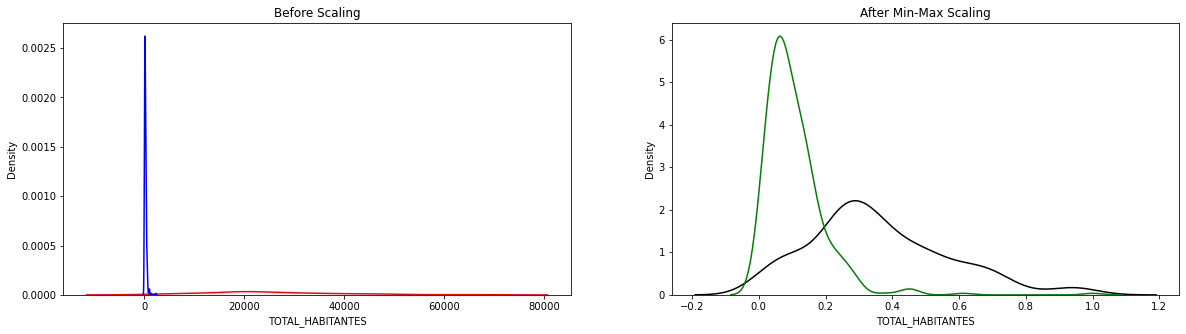

In [134]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['TOTAL_HABITANTES'], ax = ax1, color ='r')
sns.kdeplot(x['VIVIENDAS_VENTA'], ax = ax1, color ='b')

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(df_normalizados['TOTAL_HABITANTES'], ax = ax2, color ='black')
sns.kdeplot(df_normalizados['VIVIENDAS_VENTA'], ax = ax2, color ='g')
plt.show()

# Reducción de dimensionalidad

Emplearemos el PCA para reducir el número de atributos de nuestro conjunto de datos. 

In [135]:
from sklearn.decomposition import PCA

In [140]:
pca = PCA()
pca.fit(df_normalizados)

PCA()

In [141]:
pca.explained_variance_ratio_

array([3.90498980e-01, 1.53733427e-01, 7.05443687e-02, 4.65165424e-02,
       4.48181132e-02, 4.05307913e-02, 2.72052896e-02, 2.38272315e-02,
       1.94323045e-02, 1.82144975e-02, 1.50820323e-02, 1.38749403e-02,
       1.26937097e-02, 1.08675825e-02, 9.75218388e-03, 8.68038800e-03,
       8.04714892e-03, 7.50942016e-03, 7.30826966e-03, 6.80605951e-03,
       6.09222493e-03, 5.38743547e-03, 4.65624110e-03, 4.46058327e-03,
       3.65161565e-03, 3.58856391e-03, 3.39356760e-03, 3.08494203e-03,
       2.65451060e-03, 2.39271634e-03, 2.21591718e-03, 2.02211192e-03,
       1.81536961e-03, 1.66068521e-03, 1.55240659e-03, 1.28367455e-03,
       1.14769360e-03, 1.12152961e-03, 1.05350874e-03, 9.78640590e-04,
       9.08734329e-04, 8.16684496e-04, 7.45138629e-04, 7.04252346e-04,
       6.52347769e-04, 6.04024967e-04, 5.98817639e-04, 5.30066380e-04,
       4.81920654e-04, 4.36714590e-04, 4.04815366e-04, 3.31311711e-04,
       3.22518287e-04, 2.71636655e-04, 2.52000602e-04, 2.38810571e-04,
      

En segundo lugar, tenemos que decidir cuántas características queremos mantener basándonos en el gráfico de la varianza acumulada.

Text(0, 0.5, 'Varianza')

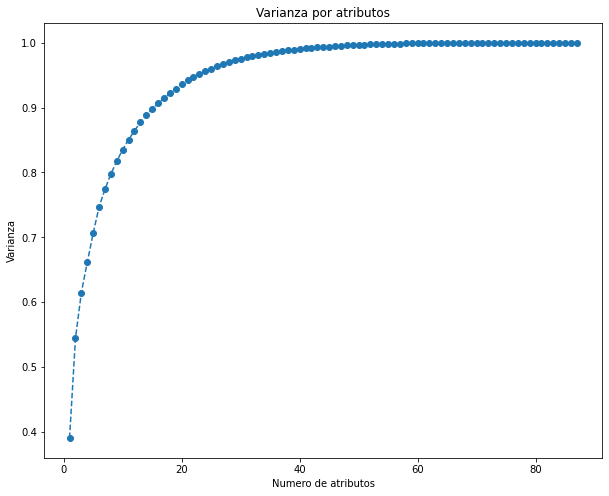

In [143]:
plt.figure(figsize = (10,8))
plt.plot(range(1,88), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza por atributos')
plt.xlabel('Numero de atributos')
plt.ylabel('Varianza')

De las 87 variables distintas que se tienen, la gráfica anterior nos indica que se puede reducir hasta tener solamente 20 variables permitiendo tener más del 90% de varianza. Es por ello, que se ha decidido reducir la dimensionalidad a 20 variables.

In [144]:
pca = PCA(n_components = 20)

In [145]:
pca.fit(df_normalizados)

PCA(n_components=20)

In [146]:
pca.transform(df_normalizados)

array([[-1.10265192,  1.13078168, -0.33656655, ...,  0.10757002,
        -0.10949016, -0.30941165],
       [ 0.04283889,  1.4894242 , -0.25829796, ...,  0.07769977,
        -0.12672297, -0.15378001],
       [-0.48196356,  1.16347456, -0.25605228, ...,  0.2159347 ,
         0.0208803 , -0.07684862],
       ...,
       [-0.50246141,  1.0241972 , -0.11043128, ...,  0.07396266,
        -0.06970166, -0.1213274 ],
       [-1.66501434,  0.53535417, -0.11908696, ...,  0.0625026 ,
         0.2331245 , -0.10657932],
       [-1.30536875,  0.77636024,  0.2975298 , ...,  0.01121445,
         0.13665575,  0.15360707]])

In [147]:
scores_pca = pca.transform(df_normalizados)

Incorporaremos las puntuaciones PCA recién obtenidas en el algoritmo K-means. Así es como podemos realizar una segmentación basada en las puntuaciones de los componentes principales en lugar de las características originales.

# Algoritmo K-means

## Elección del número de clústeres

Uno de los principales inconvenientes que presenta el algorirmo de clusterización k-means es la consistencia. El algoritmo produce diferentes resultados en función del número de clusteres seleccionados previo a la ejecución del algoritmo. Es por ello, que se utilizarán dos métodos para elegir cual es el número de clusters más apropiado para el problema ante el que nos encontramos.


### Método del codo

In [148]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scores_pca)
    sse.append(kmeans.inertia_)

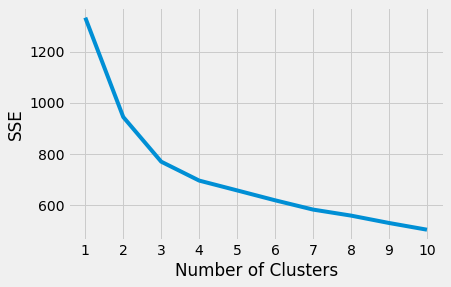

In [149]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Coeficiente de silueta

In [150]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    score = silhouette_score(scores_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

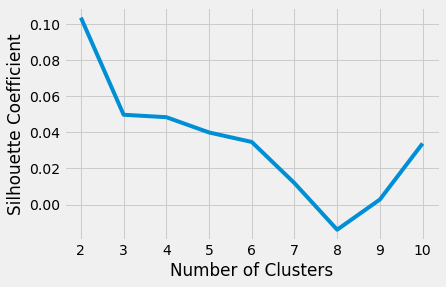

In [151]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Algoritmo

## Número clúster: 3

In [152]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init= "random", random_state= 42)
kmeans.fit(scores_pca)

KMeans(init='random', n_clusters=3, random_state=42)

In [153]:
identified_clusters = kmeans.fit_predict(scores_pca)

In [154]:
kmeans.inertia_

769.4784683935827

In [155]:
means=kmeans.cluster_centers_

In [156]:
data_with_clusters = finalDF.copy()
data_with_clusters['Clusters'] = identified_clusters 

Observar como se relacionan las variables por cluster. Vamos a ir seleccionando y combinando de dos en dos algunas de ellas

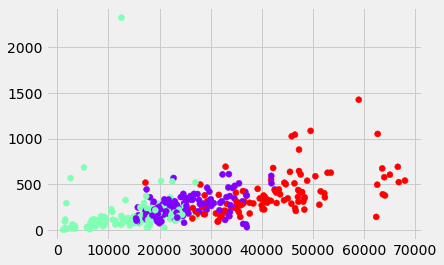

In [157]:
plt.scatter(data_with_clusters['TOTAL_HABITANTES'],data_with_clusters['VIVIENDAS_VENTA'],c=data_with_clusters['Clusters'],cmap='rainbow')

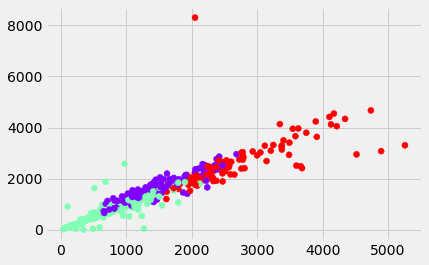

In [158]:
plt.scatter(data_with_clusters['NUM_NUEVOS_VECINOS'],data_with_clusters['NUM_VECINOS_DEJAN_BARRIO'],c=data_with_clusters['Clusters'],cmap='rainbow')

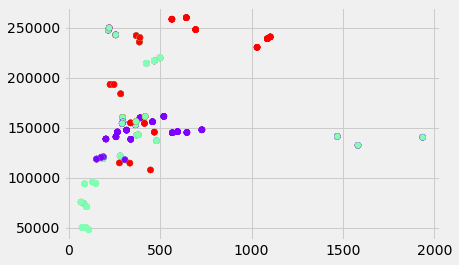

In [159]:
plt.scatter(data_with_clusters['NUM_DETENIDOS'],data_with_clusters['POBLACION'],c=data_with_clusters['Clusters'],cmap='rainbow')

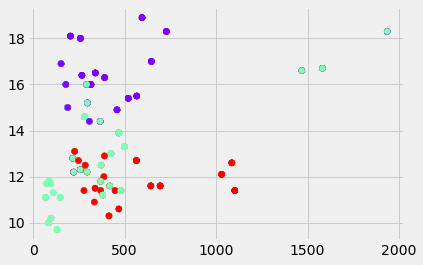

In [160]:
plt.scatter(data_with_clusters['NUM_DETENIDOS'],data_with_clusters['PRECIO_MEDIO_ALQUILER_M2'],c=data_with_clusters['Clusters'],cmap='rainbow')

Agrupar los barrios por cluster

# Visualización

## Distritos 2018

In [164]:
distritos_2018 = data_with_clusters[data_with_clusters.AÑO == "2018"]

In [165]:
cluster_distritos_2018 = distritos_2018.groupby(["DISTRITO", "Clusters"])["Clusters"].count().sort_values().groupby(level=0).tail(1)

In [166]:
distrito_18 = cluster_distritos_2018.to_frame('amount').reset_index()
distrito_18["name"] = distrito_18.DISTRITO.str[4:]
final_distrito_18 = distrito_18[["name","Clusters"]]

Para poder cruzar con el dataframe de geolocalización es necesario quitar las tildes a los distritos cuyo nombre la contienen

In [167]:
final_distrito_18["name"] = [el[0].replace('á','a') for el in zip(final_distrito_18['name'])]
final_distrito_18["name"] = [el[0].replace('é','e') for el in zip(final_distrito_18['name'])]
final_distrito_18["name"] = [el[0].replace('í','i') for el in zip(final_distrito_18['name'])]
final_distrito_18["name"] = [el[0].replace('ó','o') for el in zip(final_distrito_18['name'])]
final_distrito_18["name"] = [el[0].replace('ú','u') for el in zip(final_distrito_18['name'])]
final_distrito_18["name"] = [el[0].replace('-Canillejas','') for el in zip(final_distrito_18['name'])]


/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3387057322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_18["name"] = [el[0].replace('á','a') for el in zip(final_distrito_18['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3387057322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_18["name"] = [el[0].replace('é','e') for el in zip(final_distrito_18['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/338

In [168]:
def new_column(row):
    if row['Clusters'] == 0:
        return "blue"
    elif row['Clusters'] == 1:
        return "green"
    else:
        return "yellow"
    
final_distrito_18["COLOR"] = final_distrito_18.apply(new_column, axis=1)


/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3828878035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_18["COLOR"] = final_distrito_18.apply(new_column, axis=1)


In [169]:
import geopandas as gpd

In [170]:
data_map_madrid = gpd.read_file('geo_data/madrid-districts.geojson')

In [171]:
merge_df_18  = data_map_madrid.merge(final_distrito_18, on='name', how='left')
geo_df_18 = gpd.GeoDataFrame(merge_df_18)

In [172]:
import folium
import branca.colormap
import statistics as st



def style(feature):
    cm = branca.colormap.LinearColormap(["green", "blue", "red"], vmin=0, vmax=20)
    most_common = st.mode([feature["properties"]["COLOR"]])
    ss = {
        "fillColor": feature["properties"]["COLOR"],
        "fillOpacity": 0.8,
        "weight": 1.0,
        "color": "black",
    }
    return ss


def printMap(df):
    
    m = folium.Map(
    location=[
        sum(df.geometry.total_bounds[[1, 3]]) / 2,
        sum(df.geometry.total_bounds[[0, 2]]) / 2,
    ],
        zoom_start=10,
        control_scale=True,
    )


    folium.GeoJson(
        df.__geo_interface__,
        style_function=style,
        tooltip=folium.features.GeoJsonTooltip(["name", "Clusters"]),
    ).add_to(m)

    return m
    

In [173]:
printMap(geo_df_18)

## Distritos 2019

In [174]:
distritos_2019 = data_with_clusters[data_with_clusters.AÑO == "2019"]

In [175]:
cluster_distritos_2019 = distritos_2019.groupby(["DISTRITO", "Clusters"])["Clusters"].count().sort_values().groupby(level=0).tail(1)

In [176]:
distrito_19 = cluster_distritos_2019.to_frame('amount').reset_index()
distrito_19["name"] = distrito_19.DISTRITO.str[4:]
final_distrito_19 = distrito_19[["name","Clusters"]]

In [177]:
final_distrito_19["name"] = [el[0].replace('á','a') for el in zip(final_distrito_19['name'])]
final_distrito_19["name"] = [el[0].replace('é','e') for el in zip(final_distrito_19['name'])]
final_distrito_19["name"] = [el[0].replace('í','i') for el in zip(final_distrito_19['name'])]
final_distrito_19["name"] = [el[0].replace('ó','o') for el in zip(final_distrito_19['name'])]
final_distrito_19["name"] = [el[0].replace('ú','u') for el in zip(final_distrito_19['name'])]
final_distrito_19["name"] = [el[0].replace('-Canillejas','') for el in zip(final_distrito_19['name'])]

/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/2396649495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_19["name"] = [el[0].replace('á','a') for el in zip(final_distrito_19['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/2396649495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_19["name"] = [el[0].replace('é','e') for el in zip(final_distrito_19['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/239

In [178]:
final_distrito_19["COLOR"] = final_distrito_19.apply(new_column, axis=1)

/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/338860152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_19["COLOR"] = final_distrito_19.apply(new_column, axis=1)


In [179]:
merge_df_19  = data_map_madrid.merge(final_distrito_19, on='name', how='left')
geo_df_19 = gpd.GeoDataFrame(merge_df_19)

In [180]:
printMap(geo_df_19)

## Distritos 2020

In [188]:
distritos_2020 = data_with_clusters[data_with_clusters.AÑO == "2020"]

In [189]:
cluster_distritos_2020 = distritos_2020.groupby(["DISTRITO", "Clusters"])["Clusters"].count().sort_values().groupby(level=0).tail(1)

In [190]:
distrito_20 = cluster_distritos_2020.to_frame('amount').reset_index()
distrito_20["name"] = distrito_20.DISTRITO.str[4:]
final_distrito_20 = distrito_20[["name","Clusters"]]

In [191]:
final_distrito_20["name"] = [el[0].replace('á','a') for el in zip(final_distrito_20['name'])]
final_distrito_20["name"] = [el[0].replace('é','e') for el in zip(final_distrito_20['name'])]
final_distrito_20["name"] = [el[0].replace('í','i') for el in zip(final_distrito_20['name'])]
final_distrito_20["name"] = [el[0].replace('ó','o') for el in zip(final_distrito_20['name'])]
final_distrito_20["name"] = [el[0].replace('ú','u') for el in zip(final_distrito_20['name'])]
final_distrito_20["name"] = [el[0].replace('-Canillejas','') for el in zip(final_distrito_20['name'])]

/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3763198353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_20["name"] = [el[0].replace('á','a') for el in zip(final_distrito_20['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3763198353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_20["name"] = [el[0].replace('é','e') for el in zip(final_distrito_20['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/376

In [192]:
final_distrito_20["COLOR"] = final_distrito_20.apply(new_column, axis=1)

/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3299335928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_20["COLOR"] = final_distrito_20.apply(new_column, axis=1)


In [186]:
merge_df_20  = data_map_madrid.merge(final_distrito_20, on='name', how='left')
geo_df_20 = gpd.GeoDataFrame(merge_df_20)

In [187]:
printMap(geo_df_20)

# Número de clústers: 4

In [193]:
kmeans_4 = KMeans(n_clusters=4, init= "random", random_state= 42)
kmeans_4.fit(scores_pca)

KMeans(init='random', n_clusters=4, random_state=42)

In [194]:
identified_clusters_4 = kmeans_4.fit_predict(scores_pca)
means_4=kmeans_4.cluster_centers_

data_with_clusters_4 = finalDF.copy()
data_with_clusters_4['Clusters'] = identified_clusters_4 

## Visualización

### Distritos 2018

In [195]:
def new_column_4(row):
    if row['Clusters'] == 0:
        return "blue"
    elif row['Clusters'] == 1:
        return "green"
    elif row['Clusters'] == 2:
        return "red"
    else:
        return "yellow"

In [196]:
distritos_4_2018 = data_with_clusters_4[data_with_clusters_4.AÑO == "2018"]

cluster_distritos_4_2018 = distritos_4_2018.groupby(["DISTRITO", "Clusters"])["Clusters"].count().sort_values().groupby(level=0).tail(1)

distrito_4_18 = cluster_distritos_4_2018.to_frame('amount').reset_index()
distrito_4_18["name"] = distrito_4_18.DISTRITO.str[4:]
final_distrito_4_18 = distrito_4_18[["name","Clusters"]]

final_distrito_4_18["name"] = [el[0].replace('á','a') for el in zip(final_distrito_4_18['name'])]
final_distrito_4_18["name"] = [el[0].replace('é','e') for el in zip(final_distrito_4_18['name'])]
final_distrito_4_18["name"] = [el[0].replace('í','i') for el in zip(final_distrito_4_18['name'])]
final_distrito_4_18["name"] = [el[0].replace('ó','o') for el in zip(final_distrito_4_18['name'])]
final_distrito_4_18["name"] = [el[0].replace('ú','u') for el in zip(final_distrito_4_18['name'])]
final_distrito_4_18["name"] = [el[0].replace('-Canillejas','') for el in zip(final_distrito_4_18['name'])]

final_distrito_4_18["COLOR"] = final_distrito_4_18.apply(new_column_4, axis=1)

/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3494883311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_4_18["name"] = [el[0].replace('á','a') for el in zip(final_distrito_4_18['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3494883311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_4_18["name"] = [el[0].replace('é','e') for el in zip(final_distrito_4_18['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_

In [197]:
merge_df_4_18  = data_map_madrid.merge(final_distrito_4_18, on='name', how='left')
geo_df_4_18 = gpd.GeoDataFrame(merge_df_4_18)

printMap(geo_df_4_18)

### Distritos 2019

In [198]:
distritos_4_2019 = data_with_clusters_4[data_with_clusters_4.AÑO == "2019"]

cluster_distritos_4_2019 = distritos_4_2019.groupby(["DISTRITO", "Clusters"])["Clusters"].count().sort_values().groupby(level=0).tail(1)

distrito_4_19 = cluster_distritos_4_2019.to_frame('amount').reset_index()
distrito_4_19["name"] = distrito_4_19.DISTRITO.str[4:]
final_distrito_4_19 = distrito_4_19[["name","Clusters"]]

final_distrito_4_19["name"] = [el[0].replace('á','a') for el in zip(final_distrito_4_19['name'])]
final_distrito_4_19["name"] = [el[0].replace('é','e') for el in zip(final_distrito_4_19['name'])]
final_distrito_4_19["name"] = [el[0].replace('í','i') for el in zip(final_distrito_4_19['name'])]
final_distrito_4_19["name"] = [el[0].replace('ó','o') for el in zip(final_distrito_4_19['name'])]
final_distrito_4_19["name"] = [el[0].replace('ú','u') for el in zip(final_distrito_4_19['name'])]
final_distrito_4_19["name"] = [el[0].replace('-Canillejas','') for el in zip(final_distrito_4_19['name'])]

final_distrito_4_19["COLOR"] = final_distrito_4_19.apply(new_column_4, axis=1)

/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3762935506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_4_19["name"] = [el[0].replace('á','a') for el in zip(final_distrito_4_19['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3762935506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_4_19["name"] = [el[0].replace('é','e') for el in zip(final_distrito_4_19['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_

In [199]:
merge_df_4_19  = data_map_madrid.merge(final_distrito_4_19, on='name', how='left')
geo_df_4_19 = gpd.GeoDataFrame(merge_df_4_19)

printMap(geo_df_4_19)

### Distritos 2020

In [200]:
distritos_4_2020 = data_with_clusters_4[data_with_clusters_4.AÑO == "2020"]

cluster_distritos_4_2020 = distritos_4_2020.groupby(["DISTRITO", "Clusters"])["Clusters"].count().sort_values().groupby(level=0).tail(1)

distrito_4_20 = cluster_distritos_4_2020.to_frame('amount').reset_index()
distrito_4_20["name"] = distrito_4_20.DISTRITO.str[4:]
final_distrito_4_20 = distrito_4_20[["name","Clusters"]]

final_distrito_4_20["name"] = [el[0].replace('á','a') for el in zip(final_distrito_4_20['name'])]
final_distrito_4_20["name"] = [el[0].replace('é','e') for el in zip(final_distrito_4_20['name'])]
final_distrito_4_20["name"] = [el[0].replace('í','i') for el in zip(final_distrito_4_20['name'])]
final_distrito_4_20["name"] = [el[0].replace('ó','o') for el in zip(final_distrito_4_20['name'])]
final_distrito_4_20["name"] = [el[0].replace('ú','u') for el in zip(final_distrito_4_20['name'])]
final_distrito_4_20["name"] = [el[0].replace('-Canillejas','') for el in zip(final_distrito_4_20['name'])]

final_distrito_4_20["COLOR"] = final_distrito_4_20.apply(new_column_4, axis=1)

/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3825682281.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_4_20["name"] = [el[0].replace('á','a') for el in zip(final_distrito_4_20['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_95933/3825682281.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_distrito_4_20["name"] = [el[0].replace('é','e') for el in zip(final_distrito_4_20['name'])]
/var/folders/jp/tk456qt520g6t553s1jfv2hh0000gn/T/ipykernel_

In [207]:
merge_df_4_20  = data_map_madrid.merge(final_distrito_4_20, on='name', how='left')
geo_df_4_20 = gpd.GeoDataFrame(merge_df_4_20)

printMap(geo_df_4_20)

### Centroides

In [202]:
means1=kmeans.cluster_centers_
print(means1)

[[-1.83528585e-01  8.72384523e-01 -7.89526062e-02  7.27319268e-02
   5.70726789e-02 -5.75216721e-02  2.61125597e-02 -1.33634862e-02
   3.64659099e-02 -8.03245351e-03 -2.59061342e-02 -2.72596727e-02
  -1.07977706e-02 -6.38307364e-03  1.09072621e-02 -1.45907223e-02
  -1.20124658e-02  1.63376392e-02 -6.96408793e-04  9.07734844e-03]
 [-9.17051054e-01 -5.10076246e-01  6.12269433e-02 -4.78015282e-02
  -4.75534822e-02  4.74191909e-02  8.46520651e-03 -1.10019178e-02
  -4.94717215e-03 -5.65657196e-04 -2.55169214e-03 -1.26302846e-02
   2.11329116e-02  1.43850076e-02 -3.13584618e-03  2.83184085e-03
   1.77532087e-02 -6.83082002e-03 -3.97890809e-03 -1.00317066e-02]
 [ 1.60018343e+00 -3.25718113e-01  6.95391729e-03 -1.92670712e-02
  -1.01183152e-04  8.62152964e-04 -4.52360261e-02  3.31230264e-02
  -3.80983636e-02  1.08672342e-02  3.61363737e-02  5.28949696e-02
  -1.81272302e-02 -1.35453671e-02 -8.91927122e-03  1.39693867e-02
  -1.15582928e-02 -1.01694476e-02  6.81826782e-03  3.67471706e-03]]


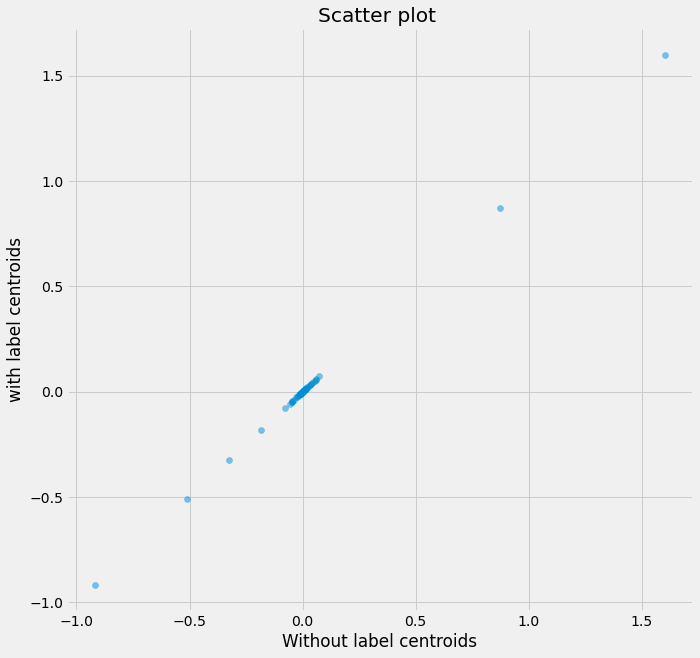

In [203]:
fig = plt.figure(figsize=(10,10))
plt.scatter(means,means1, alpha=0.5)
plt.title('Scatter plot ')
plt.xlabel('Without label centroids')
plt.ylabel('with label centroids')
plt.show()

Text(0.5, 0, 'with Label')

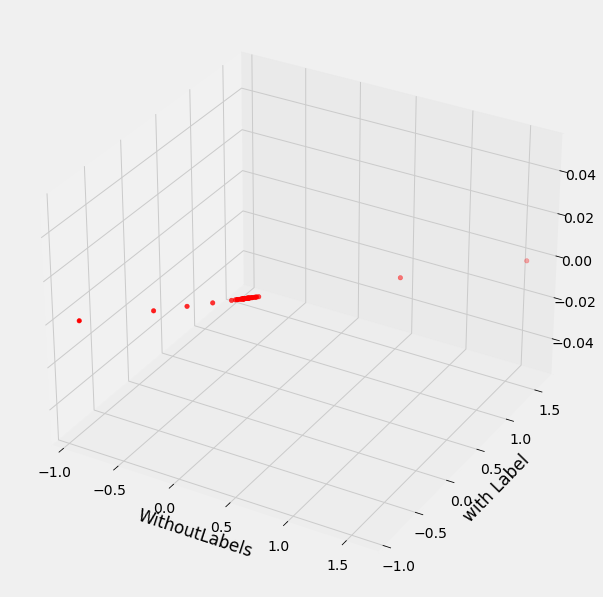

In [204]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x =means
y =means1
ax.scatter(x, y, c='r', marker='o')
ax.set_xlabel('WithoutLabels')
ax.set_ylabel('with Label')